In [1]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Membaca dataset ToN-IoT dari file parquet
df_ToN_IoT = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\NF-ToN-IoT-V2\\NF-ToN-IoT-V2.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_ToN_IoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135881 entries, 0 to 13135880
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   L4_SRC_PORT                  int32  
 1   L4_DST_PORT                  int32  
 2   PROTOCOL                     int8   
 3   L7_PROTO                     float32
 4   IN_BYTES                     int32  
 5   IN_PKTS                      int32  
 6   OUT_BYTES                    int32  
 7   OUT_PKTS                     int32  
 8   TCP_FLAGS                    int16  
 9   CLIENT_TCP_FLAGS             int16  
 10  SERVER_TCP_FLAGS             int16  
 11  FLOW_DURATION_MILLISECONDS   int32  
 12  DURATION_IN                  int32  
 13  DURATION_OUT                 int32  
 14  MIN_TTL                      int16  
 15  MAX_TTL                      int16  
 16  LONGEST_FLOW_PKT             int32  
 17  SHORTEST_FLOW_PKT            int16  
 18  MIN_IP_PKT_LEN               int16  
 19

In [11]:
# Mengganti nilai label 1 menjadi "Attack" dan 0 menjadi "Benign"
df_ToN_IoT['Label'] = df_ToN_IoT['Label'].replace({1: "Attack", 0: "Benign"})

# Memastikan perubahan telah berhasil
print(df_ToN_IoT['Label'].value_counts())

Attack    9534597
Benign    3601284
Name: Label, dtype: int64


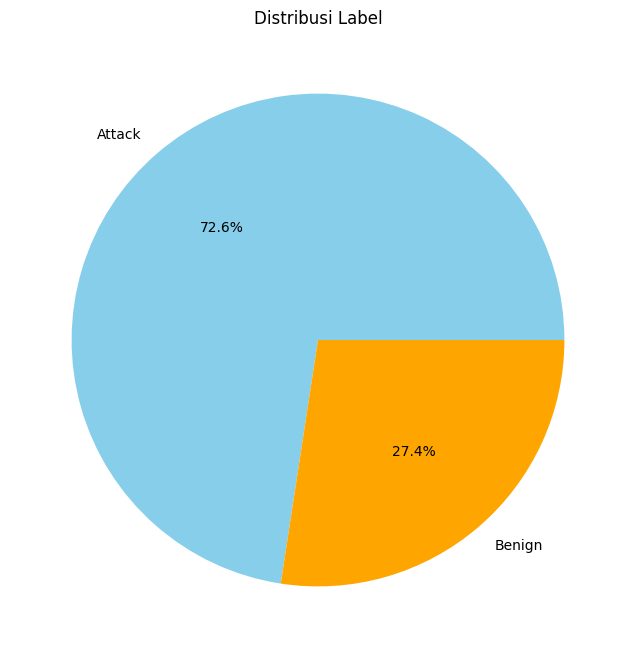

Deskripsi Distribusi Label:
Attack    9534597
Benign    3601284
Name: Label, dtype: int64


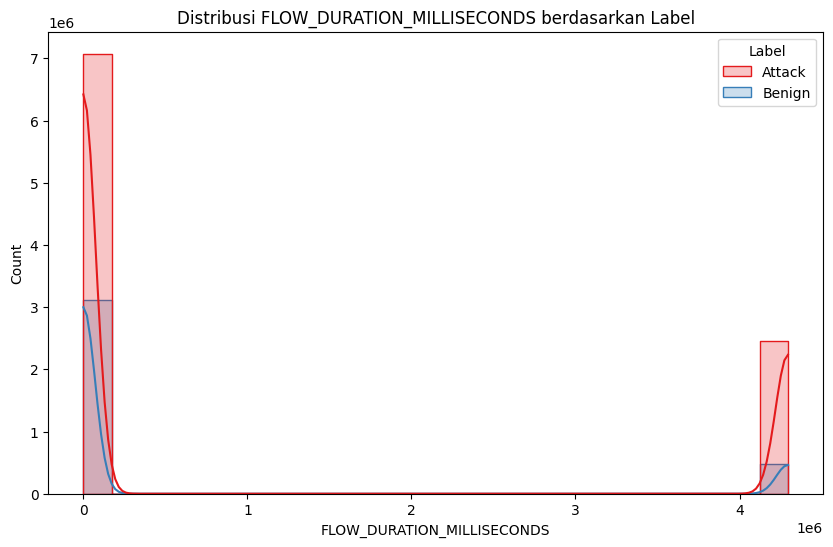


Deskripsi FLOW_DURATION_MILLISECONDS:
            count          mean           std  min  25%  50%        75%  \
Label                                                                     
Attack  9534597.0  1.108243e+06  1.879205e+06  0.0  0.0  0.0  4294145.0   
Benign  3601284.0  5.734304e+05  1.460772e+06  0.0  0.0  0.0        0.0   

              max  
Label              
Attack  4294966.0  
Benign  4294966.0  


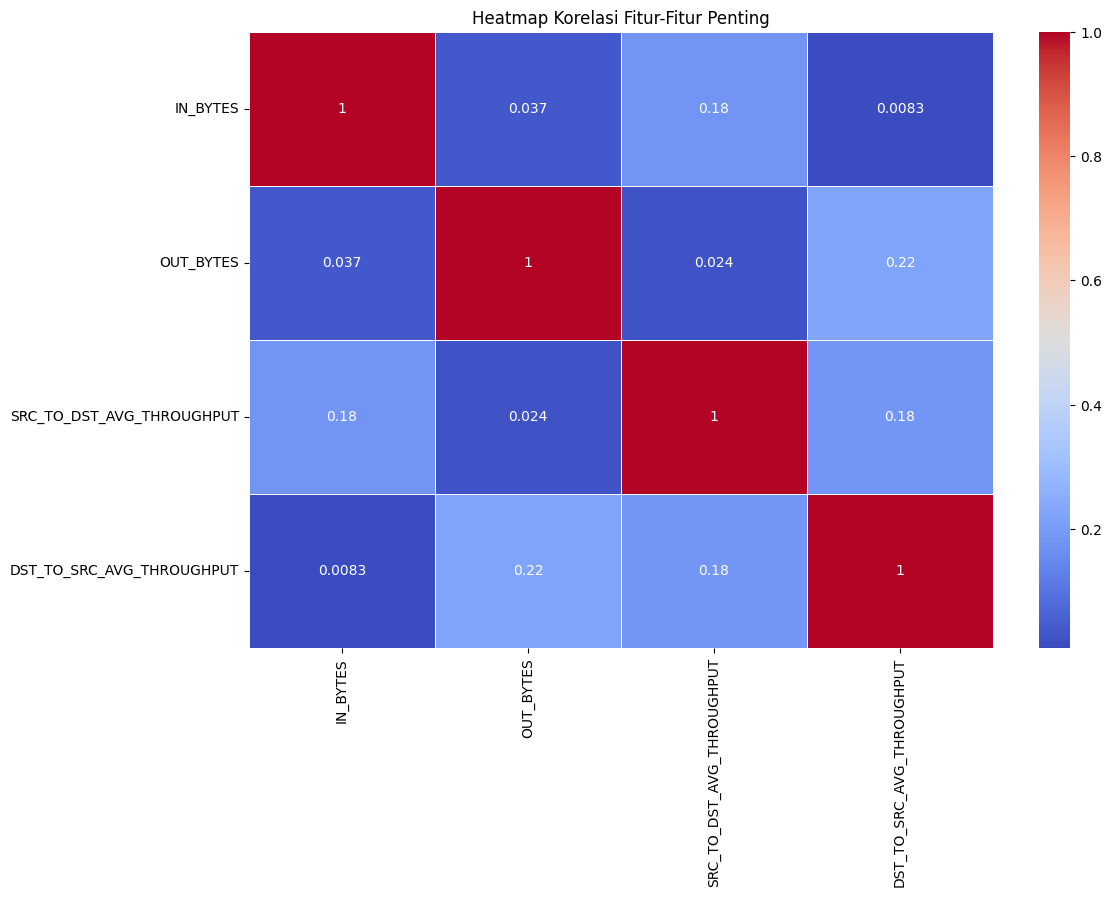


Deskripsi Korelasi Fitur:
                           IN_BYTES  OUT_BYTES  SRC_TO_DST_AVG_THROUGHPUT  \
IN_BYTES                   1.000000   0.037081                   0.179081   
OUT_BYTES                  0.037081   1.000000                   0.024378   
SRC_TO_DST_AVG_THROUGHPUT  0.179081   0.024378                   1.000000   
DST_TO_SRC_AVG_THROUGHPUT  0.008278   0.223753                   0.183772   

                           DST_TO_SRC_AVG_THROUGHPUT  
IN_BYTES                                    0.008278  
OUT_BYTES                                   0.223753  
SRC_TO_DST_AVG_THROUGHPUT                   0.183772  
DST_TO_SRC_AVG_THROUGHPUT                   1.000000  


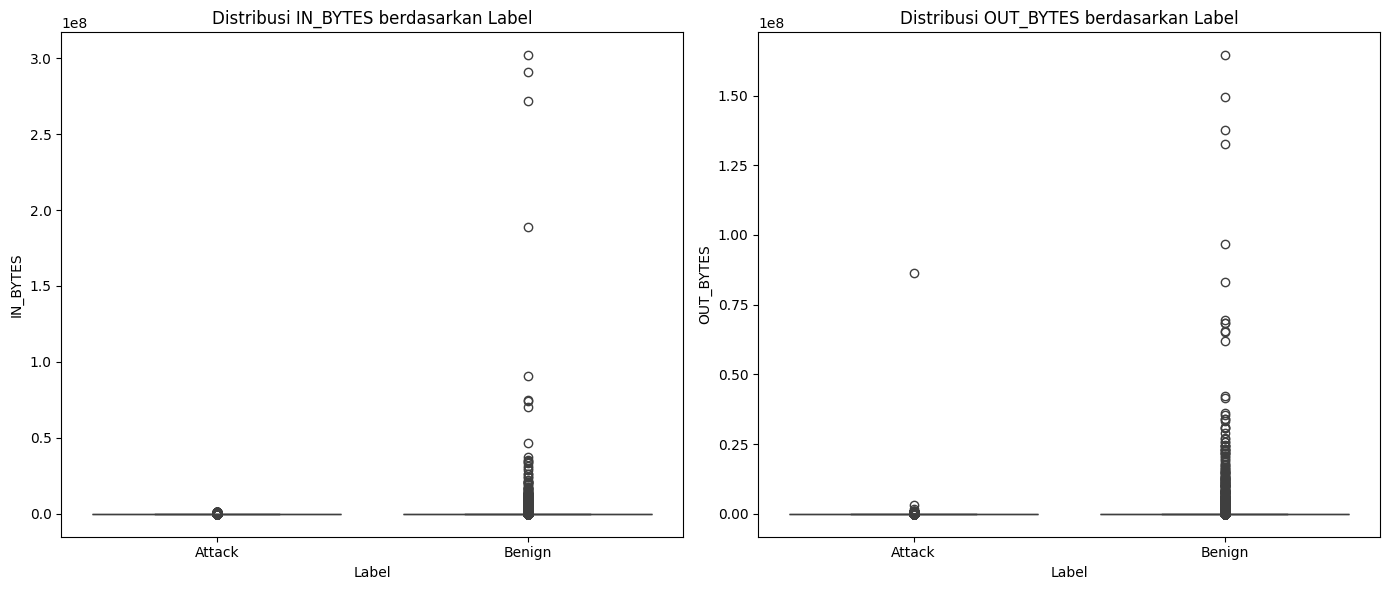


Deskripsi IN_BYTES dan OUT_BYTES:
         IN_BYTES                                                      \
            count         mean            std  min   25%   50%    75%   
Label                                                                   
Attack  9534597.0   615.739150    6775.016413  4.0  48.0  71.0  531.0   
Benign  3601284.0  1605.003236  310639.418430  4.0  44.0  44.0   93.0   

                     OUT_BYTES                                               \
                max      count         mean            std  min   25%   50%   
Label                                                                         
Attack    1235518.0  9534597.0   843.260287   28171.263078  0.0  40.0  81.0   
Benign  301926201.0  3601284.0  1581.616072  215944.817133  0.0   0.0   0.0   

                            
          75%          max  
Label                       
Attack  687.0   86395523.0  
Benign  116.0  164468797.0  


In [12]:
# Visualisasi Distribusi Label
plt.figure(figsize=(8, 8))
df_ToN_IoT["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_ToN_IoT["Label"].value_counts()
print(label_counts)

# Visualisasi Distribusi FLOW_DURATION_MILLISECONDS
plt.figure(figsize=(10, 6))
sns.histplot(df_ToN_IoT, x="FLOW_DURATION_MILLISECONDS", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi FLOW_DURATION_MILLISECONDS berdasarkan Label")
plt.xlabel("FLOW_DURATION_MILLISECONDS")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang FLOW_DURATION_MILLISECONDS
print("\nDeskripsi FLOW_DURATION_MILLISECONDS:")
print(df_ToN_IoT.groupby("Label")["FLOW_DURATION_MILLISECONDS"].describe())

# Heatmap Korelasi Fitur-Fitur Penting
features_of_interest = ["IN_BYTES", "OUT_BYTES", "SRC_TO_DST_AVG_THROUGHPUT", "DST_TO_SRC_AVG_THROUGHPUT"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_ToN_IoT[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_ToN_IoT[features_of_interest].corr())

# Visualisasi Boxplot untuk Distribusi IN_BYTES dan OUT_BYTES
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="IN_BYTES", data=df_ToN_IoT, hue="Label")
plt.title("Distribusi IN_BYTES berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="OUT_BYTES", data=df_ToN_IoT, hue="Label")
plt.title("Distribusi OUT_BYTES berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi IN_BYTES dan OUT_BYTES
print("\nDeskripsi IN_BYTES dan OUT_BYTES:")
print(df_ToN_IoT.groupby("Label")[["IN_BYTES", "OUT_BYTES"]].describe())
